In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pandas as pd
from sklearn import preprocessing


In [2]:
'''

# Define sample user profiles and attributes
#roles =['Role1','Role2','Role3','Role4','Role5']
users = ['Sam', 'Rahul', 'Larry', 'Henry', 'Leena', 'Mary','Lynda','Tom','Don','Bob']
age = np.random.randint(18, 65, size=len(users))
mlevel = np.random.choice(['M1', 'M2','M3','M4','M5'], size=len(users))
experience = np.random.randint(1, 10, size=len(users))
department = np.random.choice(['HR', 'Sales', 'IT'], size=len(users))
location = np.random.choice(['LA', 'Austin', 'Cincinnati','Delhi'], size=len(users))
labels = np.random.choice([0,1], size=len(users))

labels =[None]*len(users)
for i in range(len(users)):
    label = np.random.choice([0, 1], size=len(roles))
    labels[i] = label

# Create a DataFrame to store the user data
#data = pd.DataFrame({'User': users, 'Age': age, 'Managerlevel': mlevel, 'Experience': experience, 'Department': department,
#                    'location': location, 'roles': labels})

'''

"\n\n# Define sample user profiles and attributes\n#roles =['Role1','Role2','Role3','Role4','Role5']\nusers = ['Sam', 'Rahul', 'Larry', 'Henry', 'Leena', 'Mary','Lynda','Tom','Don','Bob']\nage = np.random.randint(18, 65, size=len(users))\nmlevel = np.random.choice(['M1', 'M2','M3','M4','M5'], size=len(users))\nexperience = np.random.randint(1, 10, size=len(users))\ndepartment = np.random.choice(['HR', 'Sales', 'IT'], size=len(users))\nlocation = np.random.choice(['LA', 'Austin', 'Cincinnati','Delhi'], size=len(users))\nlabels = np.random.choice([0,1], size=len(users))\n\nlabels =[None]*len(users)\nfor i in range(len(users)):\n    label = np.random.choice([0, 1], size=len(roles))\n    labels[i] = label\n\n# Create a DataFrame to store the user data\n#data = pd.DataFrame({'User': users, 'Age': age, 'Managerlevel': mlevel, 'Experience': experience, 'Department': department,\n#                    'location': location, 'roles': labels})\n\n"

In [3]:

data = pd.read_csv("dataset/user-roles.csv")

data = data.set_index('User')
# Display the generated sample data
print(data.head())


         Project             JobTitle Department    location  \
User                                                           
Sam    Jefferies       RiskManagement      Sales  Cincinnati   
Rahul  Jefferies       RiskManagement         IT          LA   
Larry        PFG      ClaimsAssociate         HR      Austin   
Henry        PFG       ClaimsAdjuster         HR          LA   
Leena  Jefferies  PrivateInvestigator         HR  Cincinnati   

       ITSPlanningCommittee  
User                         
Sam                       1  
Rahul                     1  
Larry                     0  
Henry                     0  
Leena                     1  


In [4]:
X = data.drop('ITSPlanningCommittee', axis=1)
y = data["ITSPlanningCommittee"].copy()

le = preprocessing.LabelEncoder()
X['Project'] = le.fit_transform(X['Project'])
print(le.classes_)
X['Department'] = le.fit_transform(X['Department'])
print(le.classes_)
X['location'] = le.fit_transform(X['location'])
print(le.classes_)
X['JobTitle'] = le.fit_transform(X['JobTitle'])
print(le.classes_)


print(X.head())

print(X.info())

['Assurant' 'Jefferies' 'PFG']
['HR' 'IT' 'Sales']
['Austin' 'Cincinnati' 'LA']
['ClaimsAdjuster' 'ClaimsAssociate' 'ClaimsExaminer' 'InsuranceAgent'
 'LossControl' 'PrivateInvestigator' 'RiskManagement']
       Project  JobTitle  Department  location
User                                          
Sam          1         6           2         1
Rahul        1         6           1         2
Larry        2         1           0         0
Henry        2         0           0         2
Leena        1         5           0         1
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Sam to Bob
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Project     10 non-null     int32
 1   JobTitle    10 non-null     int32
 2   Department  10 non-null     int32
 3   location    10 non-null     int32
dtypes: int32(4)
memory usage: 240.0+ bytes
None


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



[[1 0]
 [0 1]]
0.0

['Assurant':0 'Jefferies':1 'PFG':2]
['HR' 'IT' 'Sales']
['Austin' 'Cincinnati' 'Delhi' 'LA']
['ClaimsAdjuster' 'ClaimsAssociate' 'ClaimsExaminer' 'InsuranceAgent'
 'LossControl' 'PrivateInvestigator' 'RiskManagement']

X_test ---> 
        Project  JobTitle  Department  location
User                                          
Don          1         2           1         1
Rahul        1         6           1         2
y_test --->  User
Don      0
Rahul    1
Name: ITSPlanningCommittee, dtype: int64
pred_y --->  [0 1]


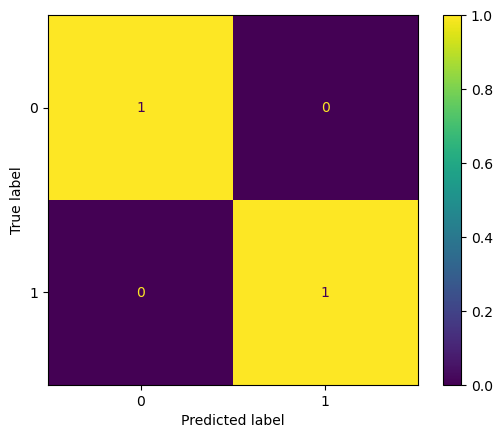

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(X_train, y_train)

pred_y = classifier.predict(X_test)
results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)

print(results)
print(error)
# Display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(results).plot()

print('''
['Assurant':0 'Jefferies':1 'PFG':2]
['HR' 'IT' 'Sales']
['Austin' 'Cincinnati' 'Delhi' 'LA']
['ClaimsAdjuster' 'ClaimsAssociate' 'ClaimsExaminer' 'InsuranceAgent'
 'LossControl' 'PrivateInvestigator' 'RiskManagement']
''')

print("X_test ---> \n",X_test)
print("y_test ---> ",y_test)
print("pred_y ---> ",pred_y)

#####  Each label as a vector of binary, where each binary element indicates whether a specific Role is assigned to this user or not. If there were 10 Roles, then the vector for this user would consist of 10 binary elements.

In [7]:
#Using the same data, but label as vector

y_Vector = np.array([[1,0,0,1,0,1,0,1,0], [1,0,0,1,0,1,0,1,0],[0,1,0,0,1,0,1,0,1],
                          [0,1,0,0,1,0,1,1,0],[1,0,0,0,1,1,0,1,0],[0,0,1,1,0,0,1,1,0],
                          [0,1,0,1,0,1,0,1,0],[0,0,1,1,0,1,0,0,1],[1,0,0,1,0,0,1,1,0],
                          [0,0,1,1,0,0,1,0,1]])  

# Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y_Vector, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier_multi = RandomForestClassifier()

# Train the classifier
rf_classifier_multi.fit(X_train_1, y_train_1)

# Make predictions on the test set
y_pred_1 = rf_classifier_multi.predict(X_test_1)

# Evaluate the performance
accuracy = accuracy_score(y_test_1, y_pred_1)
precision = precision_score(y_test_1, y_pred_1, average='samples')
recall = recall_score(y_test_1, y_pred_1, average='samples')
f1 = f1_score(y_test_1, y_pred_1, average='samples')

print("y_test_1 ----- ",y_test_1)
print("y_pred_1 ----- ",y_pred_1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


y_test_1 -----  [[1 0 0 1 0 0 1 1 0]
 [1 0 0 1 0 1 0 1 0]]
y_pred_1 -----  [[0 0 0 1 0 0 1 1 0]
 [1 0 0 1 0 1 0 1 0]]
Accuracy: 0.5
Precision: 1.0
Recall: 0.875
F1-Score: 0.9285714285714286


<h3> Unsupervised learning</h3>

##### keeping features configurable so that admin can choose the features to be used for finding peer group 

Using unsupervised learning, we can find the cluster of similar users based on their contextual attributes. 
Then either we could just recommend whatever the current user does not have compared to the peer group, and we could
further refine, 
###### Peer group analysis must take care of third party access (peer at vendor level, and user level)

<h3> Supervised learning</h3>
by running supervised learning for this peer group, to recommend only the most relevant
roles/entitlements/accounts

This will take care of minor differences in the peer group. Not everyone in the peer group needs to have the same level of 
access. They still belong to the same cluster because of the similarilty score threshold we would have chosen. Users in the
peer group might be working on different projects(which are dynamic) requiring different access.

<h3> Rule Based Logic</h3>

- Does the user already have this account/Role/Entitlement
- If entitlement is going to be recommended, does the user have an account in the application?
- Does this entitlement cause any SoD policy violation? Highlight the need for providing necessary justification, approval process
- Is this a privileged access? Highlight the need for providing necessary justification, approval process, link to PAM process in place (Just in time access)
- Logic(<b>Rule based/ML </b>) based on <b> user profile</b> (UI Feedback on how relevant each recommendation was?, <b>search keyword</b>
'''